In [1]:
import pandas
import numpy as np
import networkx as nx
from collections import Counter

## Prepare data

In [4]:
table = pandas.read_excel('pers_works_network.xlsx')

In [5]:
table

,Value,ID,Source,Name,Category,Order
0,Ach Gott und Herr,W0165,HAU1853,Ach Gott und Herr (Choral),Work,1
1,Bach'schen,P0054,HAU1853,"Bach, J. S.",Person,1
2,Beethovenschen,P0016,HAU1853,Beethoven,Person,1
3,Beethoven,P0016,HAU1853,Beethoven,Person,1
4,Der accordliche Gegensatz und die BegrÃ¼ndung ...,W0164,HAU1853,Der accordliche Gegensatz und die BegrÃ¼ndung ...,Work,1
...,...,...,...,...,...,...
2947,Wundt,P0086,CAP1905,Wundt,Person,10
2948,Zarlino,P0010,CAP1905,"Zarlino, Gioseffo",Person,10
2949,Ziehn,P0081,CAP1905,Ziehn,Person,10
2950,GewÃ¤hrsleuten,P0014,CAP1905,"Weber, Gottfried",Person,10


In [6]:
persons = table[table['Category']=='Person']

In [7]:
works = table[table['Category']=='Work']

In [13]:
nodes = []
for source in np.unique(table['Source']):
    nodes.append((source, {'type':'Source', 'order': np.unique(table[table['Source']==source]['Order'])[0]}))
for ID in np.unique(persons['ID']):
    nodes.append((ID, {'type': 'Person', 'name':np.unique(table[table['ID']==ID]['Name'])[0]}))
for ID in np.unique(works['ID']):
    nodes.append((ID, {'type': 'Work', 'name':np.unique(table[table['ID']==ID]['Name'])[0]}))

In [14]:
nodes

[('CAP1905', {'type': 'Source', 'order': 10}),
 ('HAU1853', {'type': 'Source', 'order': 1}),
 ('HOS1879', {'type': 'Source', 'order': 8}),
 ('KUN1863', {'type': 'Source', 'order': 5}),
 ('NAU1858', {'type': 'Source', 'order': 2}),
 ('OET1866', {'type': 'Source', 'order': 6}),
 ('RIE1905', {'type': 'Source', 'order': 9}),
 ('THU1877', {'type': 'Source', 'order': 7}),
 ('WEI1860', {'type': 'Source', 'order': 3}),
 ('WEI1861', {'type': 'Source', 'order': 4}),
 ('P0001', {'type': 'Person', 'name': 'Helmholtz, Hermann von'}),
 ('P0002', {'type': 'Person', 'name': 'Tiersch, Otto'}),
 ('P0003', {'type': 'Person', 'name': 'HostinskÃ½, Otakar'}),
 ('P0004', {'type': 'Person', 'name': 'Polak, A. J.'}),
 ('P0005', {'type': 'Person', 'name': 'Rameau, Jean-Philippe'}),
 ('P0006', {'type': 'Person', 'name': 'Capellen, Georg'}),
 ('P0007', {'type': 'Person', 'name': 'Hauptmann, Moritz'}),
 ('P0008', {'type': 'Person', 'name': 'Haydn, Joseph'}),
 ('P0009', {'type': 'Person', 'name': 'Winterfeld, Carl 

In [15]:
pairs = []
for i in range(10):
    book = table[table['Order']==i+1]
    book_name = np.unique(book['Source'])
    names = list(book['ID'])
    for name in names:
        pairs.append((book_name[0], name))


In [16]:
#pairs = [sorted(pair) for pair in pairs]
counter = Counter(map(tuple, pairs))

triplets = []
for (a, b), value in counter.items():
    triplet = a, b, value
    triplets.append(triplet)

In [17]:
triplets

[('HAU1853', 'W0165', 1),
 ('HAU1853', 'P0054', 1),
 ('HAU1853', 'P0016', 2),
 ('HAU1853', 'W0164', 3),
 ('HAU1853', 'W0004', 1),
 ('HAU1853', 'P0007', 2),
 ('HAU1853', 'P0133', 4),
 ('NAU1858', 'P0096', 1),
 ('NAU1858', 'W0121', 1),
 ('NAU1858', 'W0112', 3),
 ('NAU1858', 'W0117', 2),
 ('NAU1858', 'W0126', 1),
 ('NAU1858', 'W0125', 2),
 ('NAU1858', 'W0111', 10),
 ('NAU1858', 'W0116', 2),
 ('NAU1858', 'P0062', 1),
 ('NAU1858', 'P0016', 1),
 ('NAU1858', 'P0070', 1),
 ('NAU1858', 'W0122', 1),
 ('NAU1858', 'P0093', 1),
 ('NAU1858', 'P0104', 1),
 ('NAU1858', 'W0124', 1),
 ('NAU1858', 'W0130', 1),
 ('NAU1858', 'W0113', 3),
 ('NAU1858', 'W0004', 10),
 ('NAU1858', 'P0100', 3),
 ('NAU1858', 'P0091', 20),
 ('NAU1858', 'P0057', 1),
 ('NAU1858', 'P0099', 2),
 ('NAU1858', 'P0007', 16),
 ('NAU1858', 'P0013', 2),
 ('NAU1858', 'P0102', 3),
 ('NAU1858', 'W0127', 1),
 ('NAU1858', 'P0012', 5),
 ('NAU1858', 'P0036', 4),
 ('NAU1858', 'P0101', 2),
 ('NAU1858', 'W0128', 1),
 ('NAU1858', 'W0129', 1),
 ('NAU18

## Create network

In [18]:
G = nx.Graph()

In [19]:
G.add_nodes_from(nodes)

In [20]:
G.add_weighted_edges_from(triplets)

In [21]:
nx.write_graphml(G, 'ref_network.graphml')

In [29]:
G.edges(data=True)

EdgeDataView([('CAP1905', 'W0061', {'weight': 1}), ('CAP1905', 'W0096', {'weight': 1}), ('CAP1905', 'W0076', {'weight': 1}), ('CAP1905', 'W0082', {'weight': 1}), ('CAP1905', 'W0003', {'weight': 2}), ('CAP1905', 'W0002', {'weight': 3}), ('CAP1905', 'P0065', {'weight': 2}), ('CAP1905', 'P0054', {'weight': 2}), ('CAP1905', 'P0040', {'weight': 3}), ('CAP1905', 'P0072', {'weight': 1}), ('CAP1905', 'P0006', {'weight': 8}), ('CAP1905', 'W0084', {'weight': 1}), ('CAP1905', 'P0070', {'weight': 1}), ('CAP1905', 'P0011', {'weight': 1}), ('CAP1905', 'W0009', {'weight': 30}), ('CAP1905', 'W0102', {'weight': 1}), ('CAP1905', 'W0072', {'weight': 2}), ('CAP1905', 'W0088', {'weight': 1}), ('CAP1905', 'W0031', {'weight': 15}), ('CAP1905', 'W0001', {'weight': 3}), ('CAP1905', 'W0014', {'weight': 20}), ('CAP1905', 'W0098', {'weight': 25}), ('CAP1905', 'W0071', {'weight': 10}), ('CAP1905', 'W0069', {'weight': 1}), ('CAP1905', 'W0004', {'weight': 3}), ('CAP1905', 'W0097', {'weight': 1}), ('CAP1905', 'W0079'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
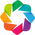

In [44]:
import holoviews as hv
import hvplot
import hvplot.networkx as hvnx
from holoviews import opts
import networkx as nx
import numpy as np

hv.extension('bokeh')
defaults = dict(width=800, height=400)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))


# Show a holoviews graph with weighted edges
def show_graph(G):
    pos = nx.spring_layout(G)  # positions for all nodes
    
    degrees = [val*5 for (node, val) in G.degree()]
    
    hv_graph = hvnx.draw(
        G, 
        pos,
        #edge_color='weight',
        edge_cmap='Cividis',
        edge_width=hv.dim('weight')/20,
        width=800,
        height=600,
        alpha=0.4,
        node_size=degrees,
        node_color='blue',
        with_labels=True,
       # font_size=8,
    )
    return hv_graph

In [45]:
show_graph(G)

:Overlay
   .Graph.I  :Graph   [start,end]   (weight)
   .Labels.I :Labels   [x,y]   (index)

## Create sub-graph

In [27]:
CAP_edges = [(u,v) for u,v in G.edges() if u=='CAP1905' or v=='CAP1905']

In [28]:
CAP_nodes = []
for u,v in CAP_edges:
    CAP_nodes.append(u)
    CAP_nodes.append(v)
CAP_nodes = np.unique(CAP_nodes)

In [29]:
H = nx.subgraph(G, CAP_nodes)

In [30]:
show_graph(H)

C:\Users\cmetrai2\anaconda3\envs\doc\lib\site-packages\holoviews\plotting\util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


:Overlay
   .Graph.I  :Graph   [start,end]   (weight)
   .Labels.I :Labels   [x,y]   (index)

## Network analysis

In [31]:
full_cont = pandas.DataFrame(index=np.unique(table['Source']), columns=np.unique(table['ID']))

In [32]:
for t in triplets:
    full_cont[t[1]][t[0]] = t[2]

In [58]:
full_cont = full_cont.fillna(0)
full_cont

Works & People,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,P0010,...,W0224,W0225,W0226,W0227,W0228,W0229,W0230,W0231,W0232,W0233
Sources,,,,,,,,,,,,,,,,,,,,,
CAP1905,14,2,3,11,10,8,15,0,0,1,...,0,0,0,0,0,0,0,0,0,0
HAU1853,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HOS1879,71,2,2,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KUN1863,0,0,0,0,2,0,33,5,0,0,...,0,0,0,0,0,0,0,0,0,0
NAU1858,0,0,0,0,0,0,16,0,0,4,...,0,0,0,0,0,0,0,0,0,0
OET1866,132,0,0,0,9,0,97,0,6,0,...,1,1,1,1,1,1,1,1,1,1
RIE1905,13,2,2,4,12,11,4,0,0,7,...,0,0,0,0,0,0,0,0,0,0
THU1877,25,0,0,0,3,0,18,2,2,1,...,0,0,0,0,0,0,0,0,0,0
WEI1860,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
sp_cont = full_cont.filter(regex='P').fillna(0)
sp_cont

,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,P0010,...,P0164,P0165,P0166,P0167,P0168,P0169,P0170,P0171,P0172,P0173
CAP1905,14,2,3,11,10,8,15,0,0,1,...,0,0,0,0,0,0,0,0,0,0
HAU1853,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HOS1879,71,2,2,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KUN1863,0,0,0,0,2,0,33,5,0,0,...,0,0,0,0,0,0,0,0,0,0
NAU1858,0,0,0,0,0,0,16,0,0,4,...,0,0,0,0,0,0,0,0,0,0
OET1866,132,0,0,0,9,0,97,0,6,0,...,6,4,3,3,1,1,2,1,2,1
RIE1905,13,2,2,4,12,11,4,0,0,7,...,0,0,0,0,0,0,0,0,0,0
THU1877,25,0,0,0,3,0,18,2,2,1,...,0,0,0,0,0,0,0,0,0,0
WEI1860,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
WEI1861,0,0,0,0,2,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
sw_cont = full_cont.filter(regex='W').fillna(0)
sw_cont

,W0001,W0002,W0003,W0004,W0005,W0006,W0007,W0008,W0009,W0010,...,W0224,W0225,W0226,W0227,W0228,W0229,W0230,W0231,W0232,W0233
CAP1905,3,3,2,3,0,0,0,0,30,2,...,0,0,0,0,0,0,0,0,0,0
HAU1853,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HOS1879,36,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KUN1863,0,0,0,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
NAU1858,0,0,0,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OET1866,52,0,0,32,2,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
RIE1905,4,1,1,2,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
THU1877,5,0,0,2,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WEI1860,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
WEI1861,0,0,0,2,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


# Correspondence Analysis

In [36]:
import prince

In [37]:
ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    benzecri=False,
    random_state=None,
    engine='auto',
)

sp_cont.columns.rename('Persons', inplace=True)
sp_cont.index.rename('Sources', inplace=True)

In [38]:
ca = ca.fit(sp_cont)

In [39]:
ca.row_coordinates(sp_cont)

,0,1
CAP1905,1.192596,0.882650
HAU1853,-0.451212,-0.652313
HOS1879,0.522171,-0.531504
KUN1863,-1.163707,0.618174
NAU1858,-0.167466,-1.480303
OET1866,-0.144943,-0.791387
RIE1905,0.903506,0.242717
THU1877,0.225821,-0.774485
WEI1860,-0.919125,0.344889
WEI1861,-1.317179,0.944625


In [40]:
ca.column_coordinates(sp_cont)

,0,1
P0001,0.234282,-0.727590
P0002,1.002133,0.251473
P0003,1.054597,0.375731
P0004,1.280865,0.904497
P0005,0.519101,0.181152
...,...,...
P0169,-0.166429,-1.005346
P0170,-0.166429,-1.005346
P0171,-0.166429,-1.005346
P0172,-0.166429,-1.005346


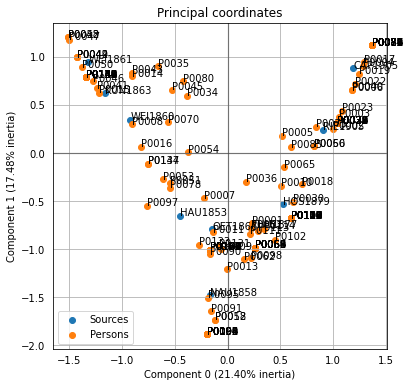

In [41]:
ax = ca.plot_coordinates(
    X=sp_cont,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True)

In [42]:
ax.get_figure().savefig('ca_coordinates.svg')

In [43]:
ca2 = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    benzecri=False,
    random_state=None,
    engine='auto',
)

sw_cont.columns.rename('Works', inplace=True)
sw_cont.index.rename('Sources', inplace=True)

In [44]:
ca2 = ca2.fit(sw_cont)

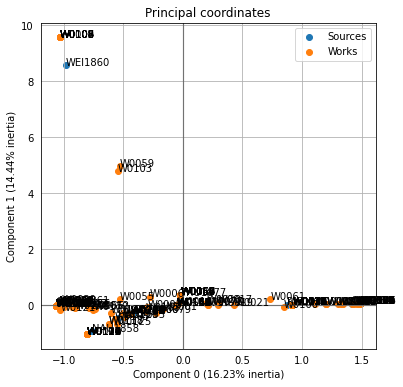

In [45]:
ax2 = ca2.plot_coordinates(
    X=sw_cont,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True)

In [46]:
ax2.get_figure().savefig('ca2_coordinates.svg')

## Multiple correspondence analysis

In [56]:
trunc_table = table[['Source', 'ID', 'Category']]
trunc_table

,Source,ID,Category
0,HAU1853,W0165,Work
1,HAU1853,P0054,Person
2,HAU1853,P0016,Person
3,HAU1853,P0016,Person
4,HAU1853,W0164,Work
...,...,...,...
2947,CAP1905,P0086,Person
2948,CAP1905,P0010,Person
2949,CAP1905,P0081,Person
2950,CAP1905,P0014,Person


In [50]:
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
mca = mca.fit(trunc_table)

FileNotFoundError: [Errno 2] No such file or directory: 'images/mca_coordinates.svg'

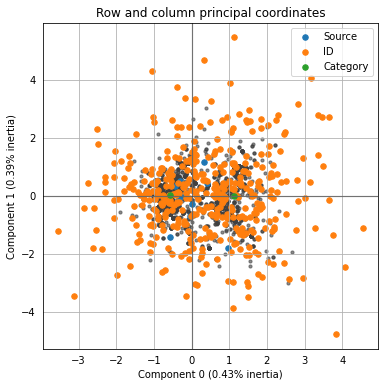

In [51]:
ax4 = mca.plot_coordinates(
    X=trunc_table,
    ax=None,
    figsize=(6, 6),
    show_row_points=True,
    row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)
ax4.get_figure().savefig('images/mca_coordinates.svg')

In [52]:
ca3 = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    benzecri=False,
    random_state=None,
    engine='auto',
)

full_cont.columns.rename('Works & People', inplace=True)
full_cont.index.rename('Sources', inplace=True)

In [53]:
ca3 = ca3.fit(full_cont)

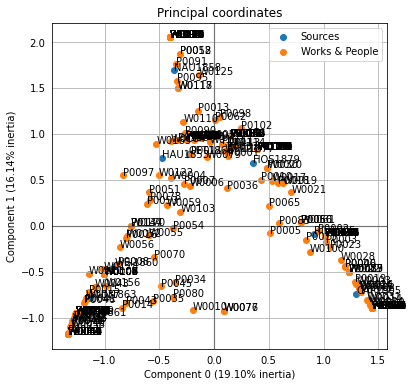

In [54]:
ax3 = ca3.plot_coordinates(
    X=full_cont,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True)

In [55]:
ax3.get_figure().savefig('ca3_coordinates.svg')

In [3]:
G =nx.read_graphml("ref_network.graphml")

In [5]:
nx.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {'node_default': {}, 'edge_default': {}},
 'nodes': [{'type': 'Source', 'id': 'CAP1905'},
  {'type': 'Source', 'id': 'HAU1853'},
  {'type': 'Source', 'id': 'HOS1879'},
  {'type': 'Source', 'id': 'KUN1863'},
  {'type': 'Source', 'id': 'NAU1858'},
  {'type': 'Source', 'id': 'OET1866'},
  {'type': 'Source', 'id': 'RIE1905'},
  {'type': 'Source', 'id': 'THU1877'},
  {'type': 'Source', 'id': 'WEI1860'},
  {'type': 'Source', 'id': 'WEI1861'},
  {'type': 'Person', 'name': 'Helmholtz, Hermann von', 'id': 'P0001'},
  {'type': 'Person', 'name': 'Tiersch, Otto', 'id': 'P0002'},
  {'type': 'Person', 'name': 'HostinskÃ½, Otakar', 'id': 'P0003'},
  {'type': 'Person', 'name': 'Polak, A. J.', 'id': 'P0004'},
  {'type': 'Person', 'name': 'Rameau, Jean-Philippe', 'id': 'P0005'},
  {'type': 'Person', 'name': 'Capellen, Georg', 'id': 'P0006'},
  {'type': 'Person', 'name': 'Hauptmann, Moritz', 'id': 'P0007'},
  {'type': 'Person', 'name': 'Haydn, Joseph', 

In [9]:
import json
json.dump?

In [10]:
with open('ref_network.json', 'w', encoding='utf-8') as file:
    json.dump(nx.node_link_data(G), file)